# 1. Data Exploration

In [704]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from scipy import stats
from scipy.stats import norm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve, f1_score
from sklearn.ensemble import RandomForestClassifier as rf_cl
from xgboost import XGBClassifier as xgb_cl
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict

In [705]:
df = pd.read_csv('/Users/naitochieri/Desktop/data for practice.csv')
df.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [706]:
df.shape

(1000, 21)

In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Default            1000 non-null int64
checkingstatus1    1000 non-null object
duration           1000 non-null int64
history            1000 non-null object
purpose            1000 non-null object
amount             1000 non-null int64
savings            1000 non-null object
employ             1000 non-null object
installment        1000 non-null int64
status             1000 non-null object
others             1000 non-null object
residence          1000 non-null int64
property           1000 non-null object
age                1000 non-null int64
otherplans         1000 non-null object
housing            1000 non-null object
cards              1000 non-null int64
job                1000 non-null object
liable             1000 non-null int64
tele               1000 non-null object
foreign            1000 non-null object
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [708]:
table1 = []
for col in df.columns:
    table1.append((col, df[col].nunique(), df[col].isnull().sum() / df.shape[0],  df[col].dtype))
    
table1_df = pd.DataFrame(table1, columns=['Variable Name', 'Unique Value', 'Missing Value', 'Data Type'])
table1_df

,Variable Name,Unique Value,Missing Value,Data Type
0,Default,2,0.0,int64
1,checkingstatus1,4,0.0,object
2,duration,33,0.0,int64
3,history,5,0.0,object
4,purpose,10,0.0,object
5,amount,921,0.0,int64
6,savings,5,0.0,object
7,employ,5,0.0,object
8,installment,4,0.0,int64
9,status,4,0.0,object


### Create a new colum

In [709]:
df['amount_monthly'] = round(df['amount']/df['duration'])

### Check & remove outlers for numerical variables

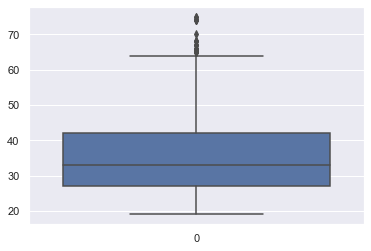

In [710]:
sns.boxplot(data=df['age'])

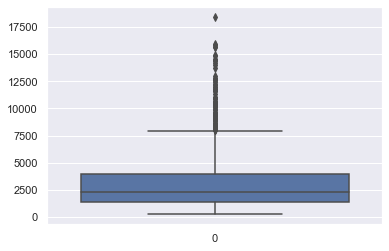

In [711]:
sns.boxplot(data=df['amount'])

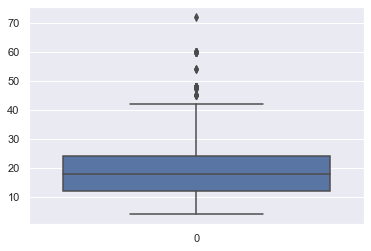

In [712]:
sns.boxplot(data=df['duration'])

In [713]:
num_cols = df[['age','amount','duration','amount_monthly']]

In [714]:
z = np.abs(stats.zscore(num_cols))
df = df[(z < 3).all(axis=1)].copy()
df.shape

(951, 22)

### Check the distribution

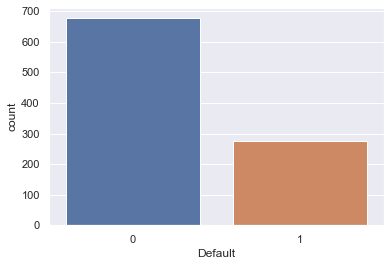

In [715]:
sns.countplot(x='Default', data=df)

In [716]:
df['age'].describe()

count    951.000000
mean      35.135647
std       10.867794
min       19.000000
25%       27.000000
50%       33.000000
75%       41.000000
max       68.000000
Name: age, dtype: float64

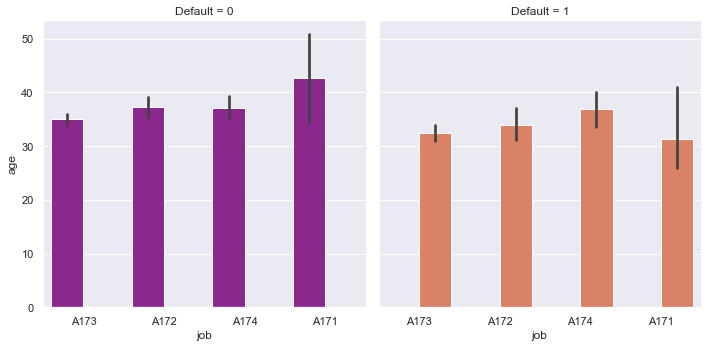

In [717]:
sns.catplot(data = df, x = 'job', y = 'age', 
               col = 'Default',
               palette = 'plasma',
               hue = 'Default',
            kind="bar")

Text(0.5, 1.0, 'Monthly amount distribution for Default')

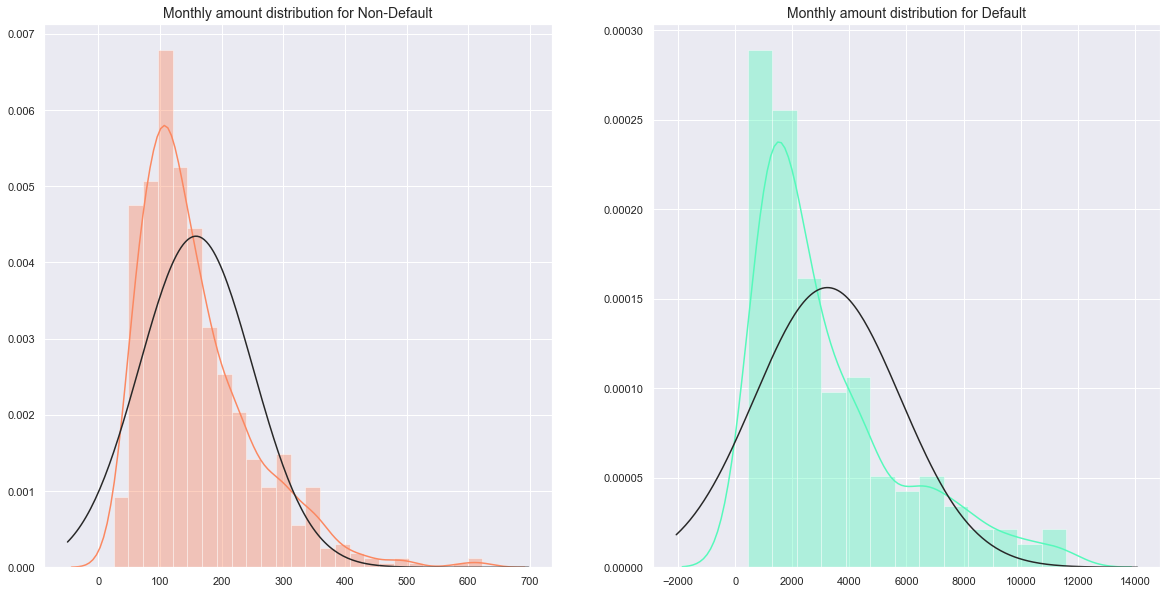

In [718]:
f, (ax1,ax2) =plt.subplots(1,2, figsize=(20, 10))

amount_monthly_dist = df['amount_monthly'].loc[df['Default'] == 0].values
sns.distplot(amount_monthly_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Monthly amount distribution for Non-Default', fontsize=14)

amount_monthly_dist = df['amount'].loc[df['Default'] == 1].values
sns.distplot(amount_monthly_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Monthly amount distribution for Default', fontsize=14)

Text(0.5, 1.0, 'Age distribution for Default')

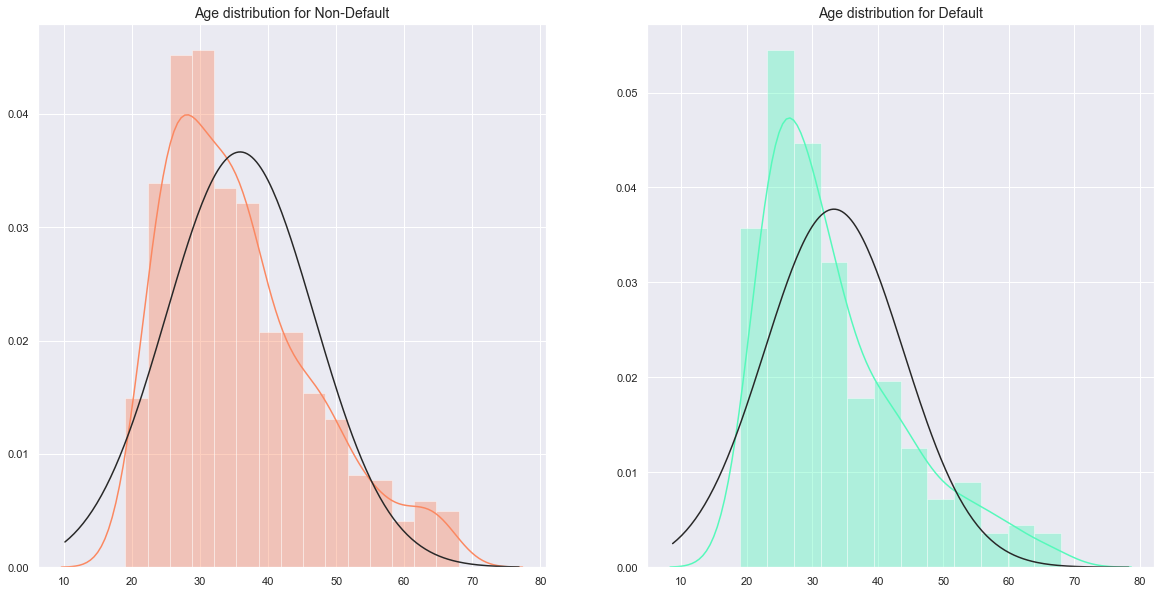

In [719]:
f, (ax1,ax2) =plt.subplots(1,2, figsize=(20, 10))

age_dist = df['age'].loc[df['Default'] == 0].values
sns.distplot(age_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Age distribution for Non-Default', fontsize=14)

age_dist = df['age'].loc[df['Default'] == 1].values
sns.distplot(age_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Age distribution for Default', fontsize=14)

### Correlation and Statistical Significance

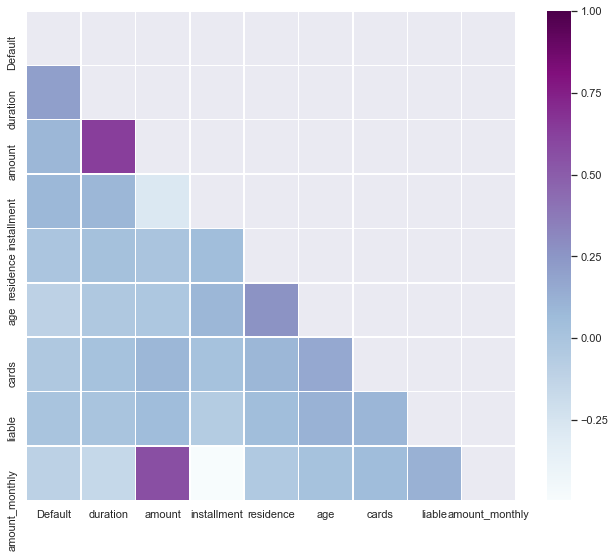

In [720]:
# Compute the correlation matrix 
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [721]:
df = df.drop(['amount','duration'], axis=1).copy()
df.shape

(951, 20)

In [722]:
model = ols("Default ~ age + checkingstatus1+others + history + purpose +savings +employ+installment+status+residence+property+age+otherplans+housing+cards+job+liable+tele+foreign+amount_monthly", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Default   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     6.478
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           7.67e-33
Time:                        11:52:17   Log-Likelihood:                -457.96
No. Observations:                 951   AIC:                             1012.
Df Residuals:                     903   BIC:                             1245.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.8802      0.182      4.825      0.000       0.522       1.238
checkingstatus1[T.A12]    -0.0978      0.038     -2.543      0.011      -0.173      -0.022
checkingstatus1[T.A13]    -0.2194      0.059     -3.741      0.000      -0.335      -0.104
checkingstatus1[T.A14]    -0.2871      0.036     -8.070      0.000      -0.357      -0.217
others[T.A102]             0.1463      0.070      2.096      0.036       0.009       0.283
others[T.A103]            -0.1384      0.061     -2.255      0.024      -0.259      -0.018
history[T.A31]            -0.0418      0.095     -0.439      0.661      -0.229       0.145
history[T.A32]            -0.2054      0.075     -2.736      0.006      -0.353      -0.058
history[T.A33]            -0.1857      0.083     -2.244      0.025      -0.348      -0.023
history[T.A34]            -0.3034      0.075     -4.027      0.000      -0.451      -0.156
purpose[T.A41]            -0.1838      0.052     -3.534      0.000      -0.286      -0.082
purpose[T.A410]           -0.2881      0.151     -1.907      0.057      -0.585       0.008
purpose[T.A42]            -0.1263      0.043     -2.956      0.003      -0.210      -0.042
purpose[T.A43]            -0.1282      0.038     -3.335      0.001      -0.204      -0.053
purpose[T.A44]            -0.1047      0.121     -0.863      0.388      -0.343       0.133
purpose[T.A45]            -0.0489      0.094     -0.521      0.602      -0.233       0.135
purpose[T.A46]             0.0271      0.067      0.407      0.684      -0.104       0.158
purpose[T.A48]            -0.3132      0.141     -2.229      0.026      -0.589      -0.037
purpose[T.A49]            -0.1001      0.054     -1.861      0.063      -0.206       0.005
savings[T.A62]            -0.0467      0.046     -1.011      0.312      -0.137       0.044
savings[T.A63]            -0.0692      0.056     -1.235      0.217      -0.179       0.041
savings[T.A64]            -0.1339      0.062     -2.143      0.032      -0.257      -0.011
savings[T.A65]            -0.0707      0.037     -1.887      0.059      -0.144       0.003
employ[T.A72]             -0.0612      0.074     -0.832      0.406      -0.205       0.083
employ[T.A73]             -0.0948      0.071     -1.336      0.182      -0.234       0.045
employ[T.A74]             -0.1570      0.074     -2.127      0.034      -0.302      -0.012
employ[T.A75]             -0.1398      0.071     -1.964      0.050      -0.279   -9.19e-05
status[T.A92]             -0.0857      0.065     -1.310      0.191      -0.214       0.043
status[T.A93]             -0.1248      0.064     -1.945      0.052      -0.251       0.001
status[T.A94]             -0.1271      0.076     -1.682      0.093      -0.275       0.021
property[T.A122]           0.0481      0.038      1.256      0.209      -0.027  

## 2. Training Model

In [723]:
X = df.drop(['Default'], 1).copy()
y = df['Default'].copy()

In [729]:
# Get dummies
X = pd.get_dummies(X, drop_first=True).copy()

In [730]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [731]:
from collections import Counter
print('Before undersample {}'.format(Counter(y_train)))

Before undersample Counter({0: 473, 1: 192})


In [732]:
rus = RandomUnderSampler(sampling_strategy=0.5)
X_rus, y_rus = rus.fit_sample(X_train, y_train)

In [733]:
print('After undersample {}'.format(Counter(y_rus)))

After undersample Counter({0: 384, 1: 192})


### Random Forest

In [760]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
rf.fit(X_rus, y_rus)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [761]:
rf_pred = rf.predict(X_test)

In [762]:
accuracy_score(y_test, rf_pred)

0.7342657342657343

In [763]:
conf_mat = confusion_matrix(y_test, rf_pred)
conf_mat

array([[197,   7],
       [ 69,  13]])

In [764]:
scores = cross_val_score(rf, X, y, scoring='roc_auc', cv=5)
print('5-Fold AUC: {}'.format(np.mean(scores)))

5-Fold AUC: 0.7527674787086551


In [765]:
print("train score:", rf.score(X_rus, y_rus))
print("test score:", rf.score(X_test, y_test))

train score: 0.7743055555555556
test score: 0.7342657342657343


In [766]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
checkingstatus1_A14,0.165211
amount_monthly,0.150440
age,0.086037
savings_A65,0.039269
history_A34,0.036090
installment,0.034491
checkingstatus1_A12,0.030512
residence,0.026319
history_A31,0.025511
property_A124,0.023173


### XGBoost

In [743]:
# fit the model
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_rus, y_rus)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [744]:
xgb_pred = xgb_cl.predict(X_test)
xgb_prob = xgb_cl.predict_proba(X_test)

In [745]:
accuracy_score(y_test, xgb_pred)

0.7692307692307693

In [746]:
conf_mat = confusion_matrix(y_test, xgb_pred)
conf_mat

array([[179,  25],
       [ 41,  41]])

In [747]:
scores = cross_val_score(xgb_cl, X, y, scoring='roc_auc', cv=5)
print('5-Fold AUC: {}'.format(np.mean(scores)))

5-Fold AUC: 0.7598127351950881


In [748]:
print("train score:", xgb_cl.score(X_rus, y_rus))
print("test score:", xgb_cl.score(X_test, y_test))

train score: 0.8732638888888888
test score: 0.7692307692307693


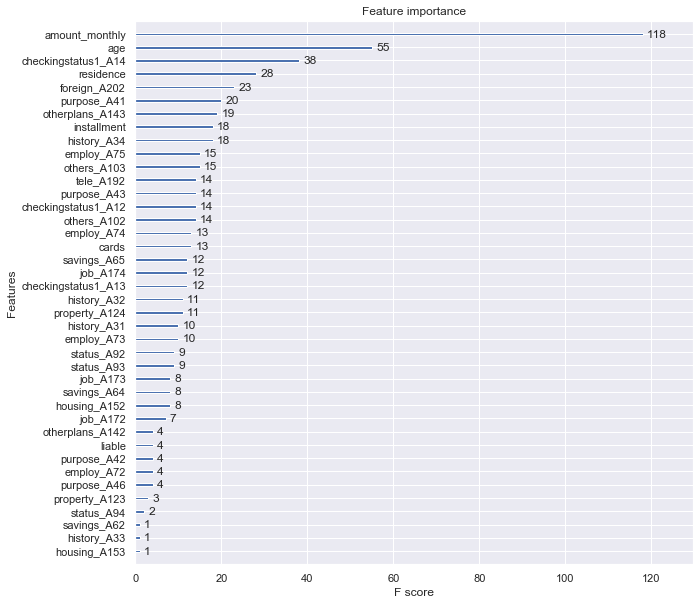

In [702]:
# plot feature importance
xgb.plot_importance(xgb_cl)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

### ROC

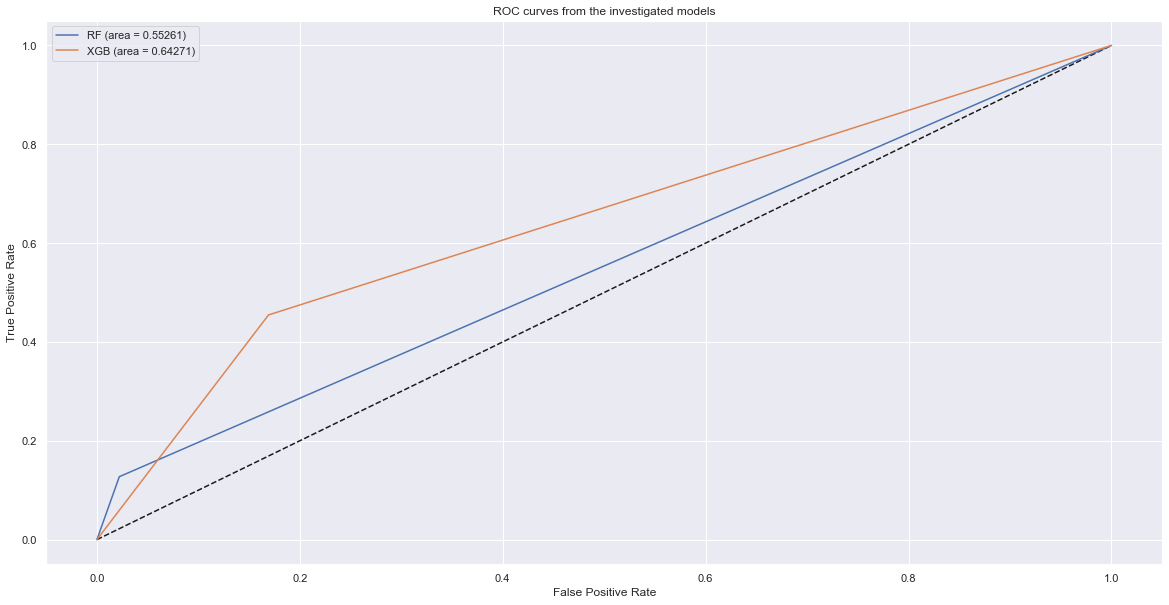

In [683]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_pred)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.5f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = %0.5f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()